# WeatherPY

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude¶
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = https://api.openweathermap.org/data/2.5/weather?

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Object `weather` not found.
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | morondava
Processing Record 5 of Set 1 | korsakov
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | tegucigalpa
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | nizhneudinsk
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | kayenta
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | mana
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | jamiltepec
Processing Record 22 of Set 1 | daru
Proce

Processing Record 39 of Set 4 | bayanaul
Processing Record 40 of Set 4 | keflavik
Processing Record 41 of Set 4 | fale old settlement
Processing Record 42 of Set 4 | ingeniero jacobacci
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | tonj
Processing Record 45 of Set 4 | seven pagodas
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | mount gambier
Processing Record 0 of Set 5 | crane
Processing Record 1 of Set 5 | revda
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | aars
Processing Record 4 of Set 5 | luanda
Processing Record 5 of Set 5 | hungerford
Processing Record 6 of Set 5 | puerto deseado
Processing Record 7 of Set 5 | santo antonio do ica
Processing Record 8 of Set 5 | kerikeri
Processing Record 9 of Set 5 | progreso
Processing Record 10 of Set 5 | aripuana
Processing Record 11 of Set 5 | yung shue wan
Processing Record 12 of 

Processing Record 27 of Set 8 | espargos
City not found. Skipping...
Processing Record 28 of Set 8 | tynda
Processing Record 29 of Set 8 | zangguy
City not found. Skipping...
Processing Record 30 of Set 8 | hirara
Processing Record 31 of Set 8 | priozersk
Processing Record 32 of Set 8 | plastun
Processing Record 33 of Set 8 | akjoujt
Processing Record 34 of Set 8 | al hufuf
Processing Record 35 of Set 8 | rouissat
Processing Record 36 of Set 8 | eaglehawk
Processing Record 37 of Set 8 | tshikapa
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | tsengel
Processing Record 40 of Set 8 | santa fe de antioquia
Processing Record 41 of Set 8 | al jahra'
Processing Record 42 of Set 8 | baganga
Processing Record 43 of Set 8 | indergarh
Processing Record 44 of Set 8 | ambodifotatra
Processing Record 45 of Set 8 | eraan
Processing Record 46 of Set 8 | patong
Processing Record 47 of Set 8 | san sebastian de la gomera
Processing Record 48 of Set 8 | taroa
Processing R

Processing Record 15 of Set 12 | dolores
Processing Record 16 of Set 12 | al jumum
Processing Record 17 of Set 12 | rawlins
Processing Record 18 of Set 12 | hamina
Processing Record 19 of Set 12 | simpang
Processing Record 20 of Set 12 | lohja
-----------------------------
Data Retrieval Complete      
-----------------------------


In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,280.53,70,100,1.01,US,1698613202
1,tiksi,71.6872,128.8694,257.66,99,92,2.88,RU,1698613206
2,blackmans bay,-43.0167,147.3167,287.22,60,93,1.34,AU,1698613211
3,morondava,-20.2833,44.2833,298.15,74,13,4.71,MG,1698613359
4,korsakov,46.6328,142.7813,269.06,71,14,1.23,RU,1698613215


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [163]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,280.53,70,100,1.01,US,1698613202
1,tiksi,71.6872,128.8694,257.66,99,92,2.88,RU,1698613206
2,blackmans bay,-43.0167,147.3167,287.22,60,93,1.34,AU,1698613211
3,morondava,-20.2833,44.2833,298.15,74,13,4.71,MG,1698613359
4,korsakov,46.6328,142.7813,269.06,71,14,1.23,RU,1698613215


# Create the Scatter Plots Requested
Latitude Vs. Temperature

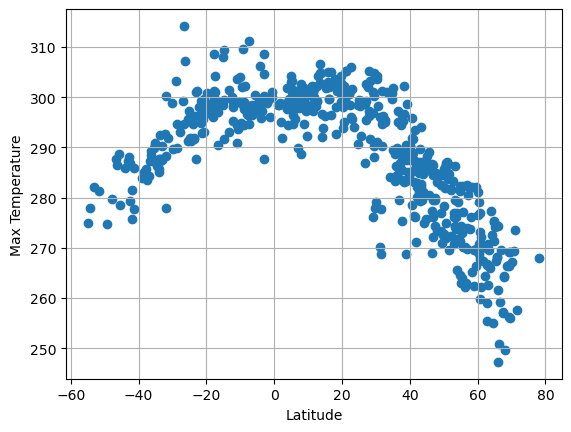

In [118]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

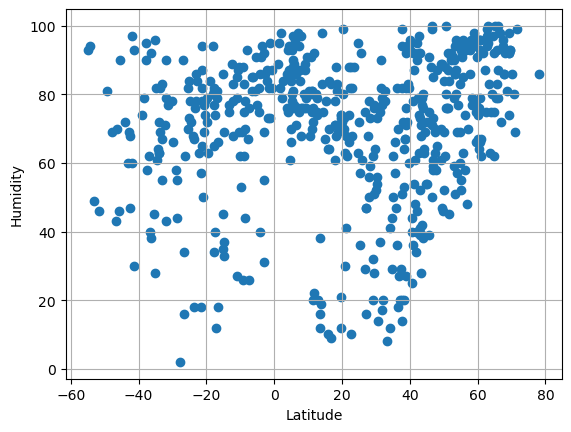

In [119]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

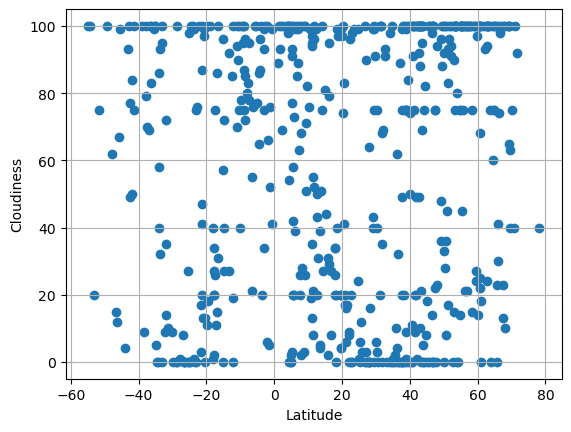

In [120]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

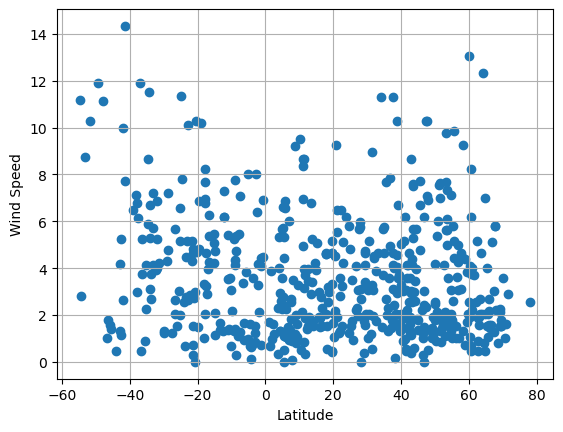

In [121]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [122]:
# Define a function to create Linear Regression plots
r, p_value = pearsonr(x_values, y_values)
(slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      3.053451
1      2.850073
2      4.444173
3      4.128235
4      3.198267
         ...   
541    3.545926
542    3.265555
543    3.004578
544    3.863951
545    3.009041
Name: Lat, Length: 546, dtype: float64


In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,280.53,70,100,1.01,US,1698613202
1,tiksi,71.6872,128.8694,257.66,99,92,2.88,RU,1698613206
4,korsakov,46.6328,142.7813,269.06,71,14,1.23,RU,1698613215
6,whitehorse,60.7161,-135.0538,270.94,93,100,6.17,CA,1698613219
8,tegucigalpa,14.0818,-87.2068,296.57,83,75,1.54,HN,1698613291


In [124]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,287.22,60,93,1.34,AU,1698613211
3,morondava,-20.2833,44.2833,298.15,74,13,4.71,MG,1698613359
5,afaahiti,-17.7500,-149.2833,300.08,82,34,6.80,PF,1698613218
7,waitangi,-43.9535,-176.5597,285.83,72,4,0.45,NZ,1698613221
11,lebu,-37.6167,-73.6500,283.55,58,70,6.15,CL,1698613328


Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7411840526543182


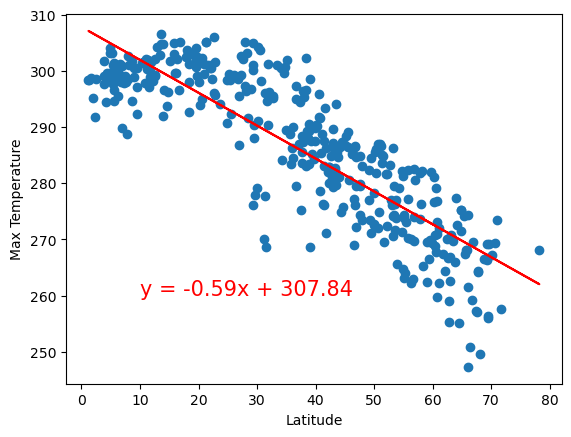

In [166]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(text=line_eq,xy=(10,260),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5570014593044504


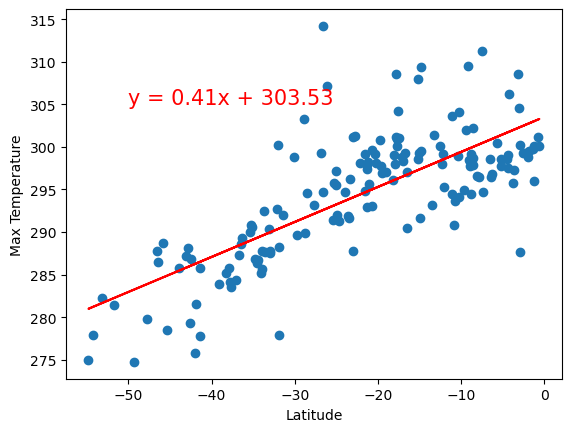

In [168]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(text=line_eq,xy=(-50,305),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: In the Northern Hemisphere, you see that there is a negative linear relationship with the Max Temperature and Latitude, which means that as the Latitude increases, the Max Temperature decreases.  In the Southern Hemisphere you see the opposite in the linear relationship.  As the Latitude increases, so does the Max Temperature, which means that there is a positive linear relationship.

Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02036628937215524


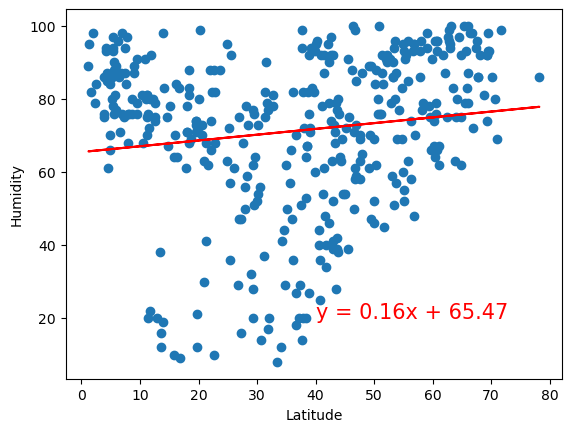

In [170]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(text=line_eq,xy=(40,20),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.01201620562160051


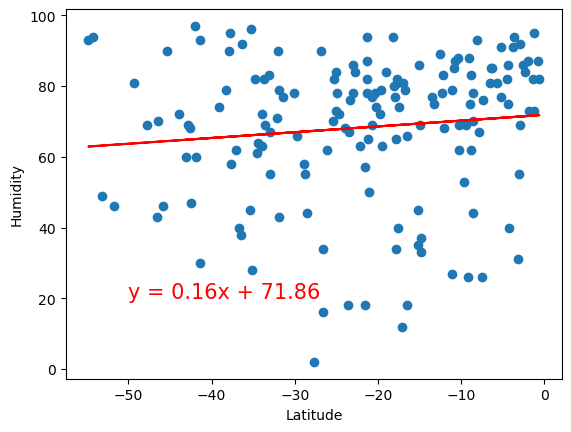

In [171]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(text=line_eq,xy=(-50,20),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: In both the Northern and Southern Hemispheres, there seems to be no strong correlation between Latitude and Humidity. 

Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024151314074436058


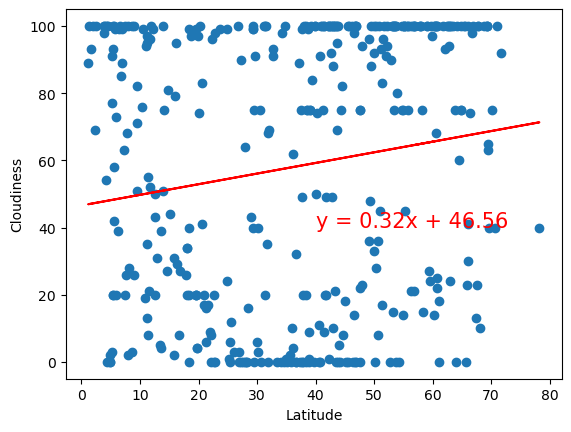

In [172]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(text=line_eq,xy=(40,40),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.007985512578546886


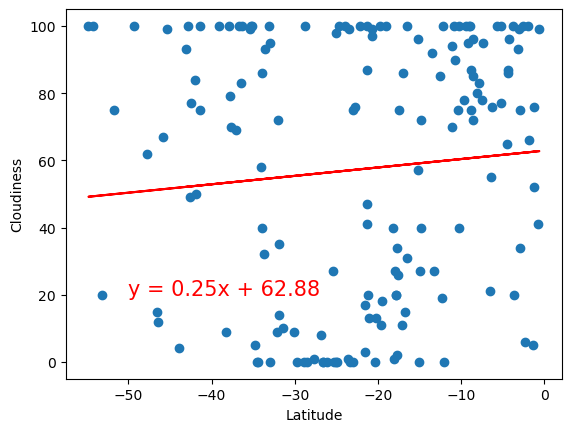

In [173]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(text=line_eq,xy=(-50,20),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: The linear relationship between Latitude and Cloudiness is slightly positive in both the Northern and Southern Hemispheres. 

Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007381324594526402


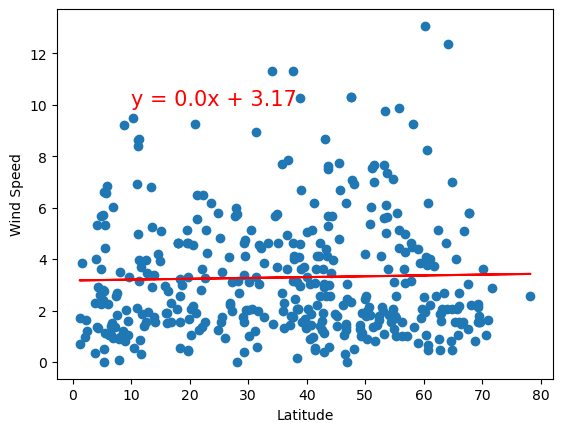

In [174]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(text=line_eq,xy=(10,10),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0842854046313649


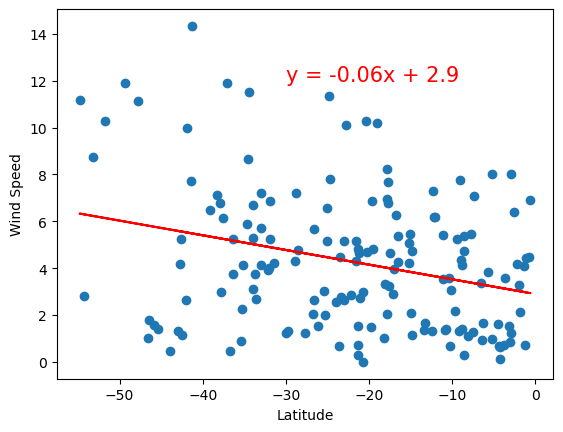

In [175]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

# Plot linear regression
plt.plot(x_values,regress_values,"r-")


# Plot labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(text=line_eq,xy=(-30,12),fontsize=15,color="red")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: The linear relationship for the Northern Hemisphere for Wind Speed and latitude is not correlated, however, I do notice that the majority of the Wind Speed is below 4.  Now, in the Southern Hemisphere, the linear relationship between Latitude and Wind Speed is negative. Which means that as the Latitude increases, the Wind Speed decreases.